# Assignment 2
### Understanding Uncertainty
### Due 9/12

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

To define the most profitable item, I calculated profit as the difference between the State Bottle Retail (selling price) and the State Bottle Cost (purchase price), multiplied by the number of bottles sold. This definition makes sense because it accounts for both unit margin and sales volume, giving a realistic measure of overall profitability.

In [5]:
idf = pd.read_csv("./data/iowa.csv")

idf.columns = idf.columns.str.strip()
def money_to_float(s):
    return pd.to_numeric(
        s.astype(str).str.replace(r"[\$,]", "", regex=True),
        errors="coerce"
    )

idf["State Bottle Retail"] = money_to_float(idf["State Bottle Retail"])
idf["State Bottle Cost"]   = money_to_float(idf["State Bottle Cost"])
idf["Bottles Sold"]        = pd.to_numeric(idf["Bottles Sold"], errors="coerce").fillna(0).astype(int)

idf["Profit"] = (idf["State Bottle Retail"] - idf["State Bottle Cost"]) * idf["Bottles Sold"]

profits = (
    idf.groupby(["Item Number", "Item Description"])
       .agg(
           Total_Bottles_Sold = ("Bottles Sold", "sum"),
           Total_Profit       = ("Profit", "sum"),
           Avg_Retail_Price   = ("State Bottle Retail", "mean")
       )
       .reset_index()
       .sort_values("Total_Profit", ascending=False)
)

/var/folders/jd/kgmmf40n35d3bhgwcsrqn78r0000gn/T/ipykernel_62130/305746288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


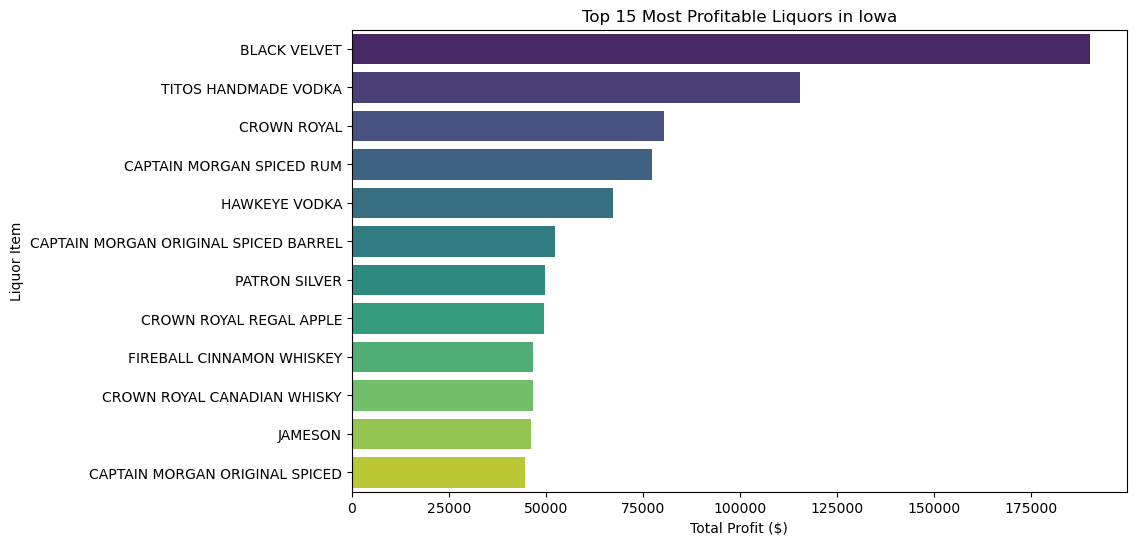

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top15, 
    y="Item Description", 
    x="Total_Profit", 
    errorbar=None, 
    palette="viridis"
)
plt.title("Top 15 Most Profitable Liquors in Iowa")
plt.xlabel("Total Profit ($)")
plt.ylabel("Liquor Item")
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [7]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

When we try `x - y`, Python raises an error. 
This happens because the arrays have incompatible shapes `(3,)` and `(2,)` that cannot be aligned for elementwise subtraction. 

In [10]:
x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

When we run `x.reshape(-1,1) - y.reshape(1,-1)`, NumPy broadcasts `x` as a column vector and `y` as a row vector. This produces a 3×2 matrix where each element is the difference between one element of `x` and one element of `y`. This shows all pairwise differences between values in `x` and `y`.



In [11]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

When we compute `x.reshape(-1,1) - y.reshape(1,-1)`, the result is a **3×2 matrix**, where each row of `x` is compared against every element of `y`.  

In contrast, `x.reshape(1,-1) - y.reshape(-1,1)` gives a **2×3 matrix**, where each element of `y` is subtracted from the entire row of `x`.  

Both operations perform pairwise broadcasting, but the orientation of the reshaping determines whether the result is 3×2 or 2×3.

In [12]:
res1 = []
for i in range(len(x)):
    row = []
    for j in range(len(y)):
        row.append(x[i] - y[j])
    res1.append(row)
print(np.array(res1))

res2 = []
for i in range(len(y)):
    row = []
    for j in range(len(x)):
        row.append(x[j] - y[i])
    res2.append(row)
print(np.array(res2))

[[-1 -4]
 [ 1 -2]
 [ 3  0]]
[[-1  1  3]
 [-4 -2  0]]


Using `x.reshape(1,-1)` changes `x` from a 1D array into a row vector (shape 1×3). Using `x.reshape(-1,1)` changes `x` into a column vector (shape 3×1).  

This difference in orientation determines how broadcasting expands the arrays:  
- With a column vector, each element of `x` is compared against all elements of `y`.  
- With a row vector, each element of `y` is compared against the entire row of `x`.  


3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

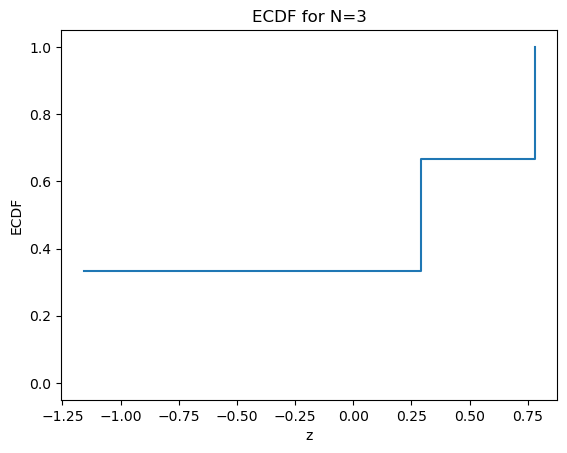

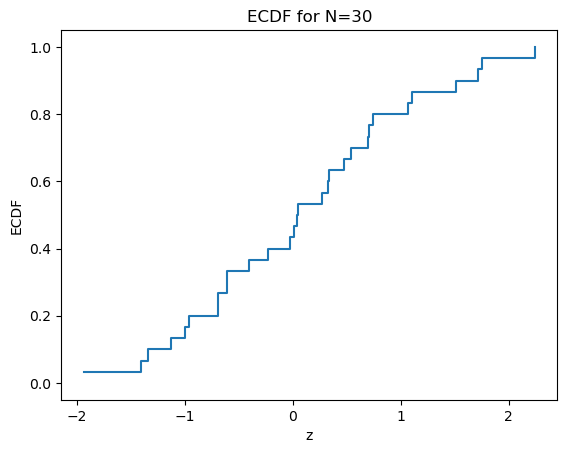

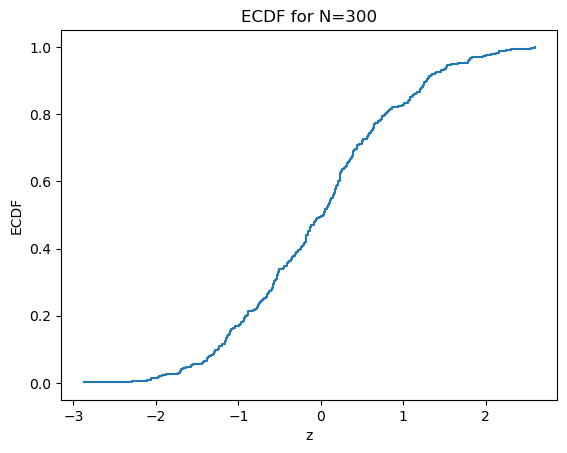

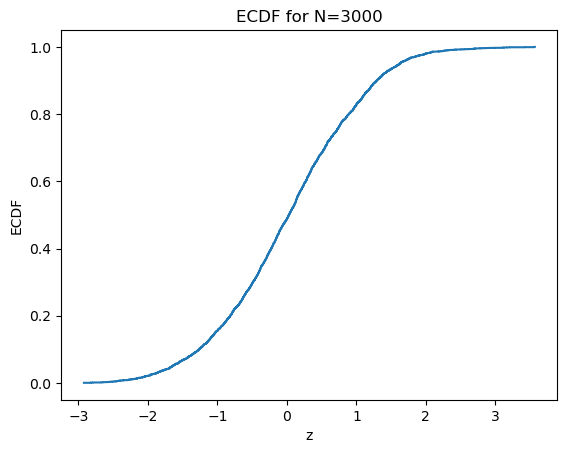

In [14]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3, 30, 300, 3000):
    X = rng.normal(0,1,N)
    
    Z = np.sort(np.unique(X))
    compare = X.reshape(-1,1) <= Z.reshape(1,-1)
    ecdf = np.mean(compare, axis=0)

    plt.step(Z, ecdf, where="post")
    plt.ylim(-0.05, 1.05)
    plt.xlabel("z")
    plt.ylabel("ECDF")
    plt.title(f"ECDF for N={N}")
    plt.show()


As the sample size \(N\) increases, the ECDF becomes smoother and more stable. With very small \(N\) (e.g., 3 or 30), the ECDF is jagged and shows large jumps because each observation has a big impact. As \(N\) grows to 300 and 3000, the steps become smaller, and the ECDF better approximates the true cumulative distribution function of the underlying normal distribution. In other words, larger samples reduce variability and make the ECDF more representative of the population.


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?